# CATS vs DOGS Image Classification using Convolutional Neural Networks

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:\\Users\\Supriya\\Downloads\\Bharatintern\\dogcatcnn\\dogvscat\\train'
test_dir = 'C:\\Users\\Supriya\\Downloads\\Bharatintern\\dogcatcnn\\dogvscat\\test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)


Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# Convolutional Neural Network

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [12]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [13]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

C:\Users\Supriya\AppData\Local\Temp\ipykernel_10480\113228744.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/10


25/25 [==============================] - 93s 3s/step - loss: 0.7675 - accuracy: 0.5420 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 2/10
25/25 [==============================] - 75s 3s/step - loss: 0.6968 - accuracy: 0.5140 - val_loss: 0.6931 - val_accuracy: 0.4750
Epoch 3/10
25/25 [==============================] - 75s 3s/step - loss: 0.6934 - accuracy: 0.5300 - val_loss: 0.7114 - val_accuracy: 0.4500
Epoch 4/10
25/25 [==============================] - 77s 3s/step - loss: 0.6967 - accuracy: 0.4840 - val_loss: 0.6969 - val_accuracy: 0.4750
Epoch 5/10
25/25 [==============================] - 75s 3s/step - loss: 0.6949 - accuracy: 0.5460 - val_loss: 0.8134 - val_accuracy: 0.5000
Epoch 6/10
25/25 [==============================] - 76s 3s/step - loss: 0.6984 - accuracy: 0.5240 - val_loss: 0.6854 - val_accuracy: 0.5250
Epoch 7/10
25/25 [==============================] - 76s 3s/step - loss: 0.6984 - accuracy: 0.5680 - val_loss: 0.7146 - val_accuracy: 0.5000
Epoch 8/10
25/25 [

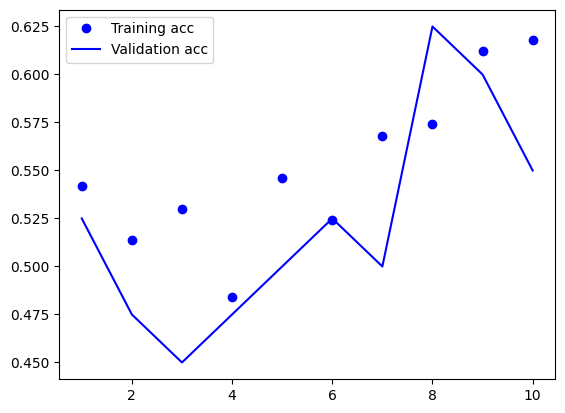

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

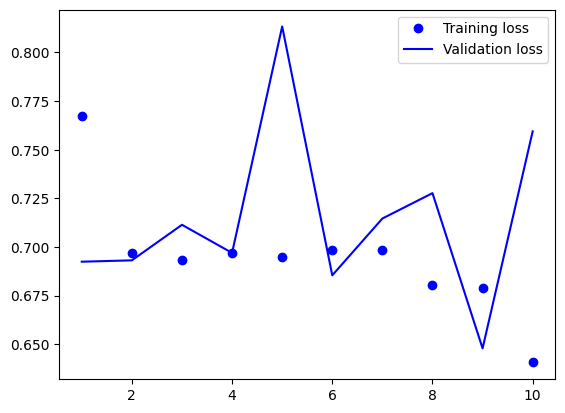

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [16]:
model.save('catvsdog.h5')

c:\Users\Supriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


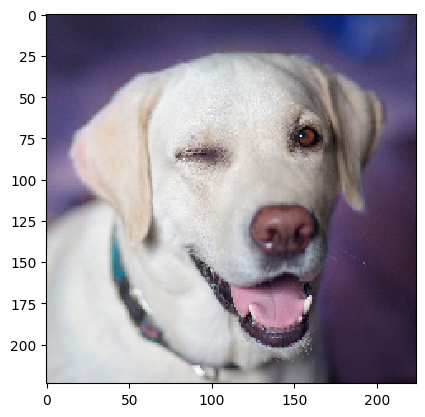

In [22]:
from tensorflow.keras.preprocessing import image
path ="C:\\Users\\Supriya\\Downloads\\Bharatintern\\dogcatcnn\\dogvscat\\test\\1\\250.jpg"
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [23]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [24]:
img_array=img_array.reshape(1,224,224,3)

In [26]:
a = model.predict(img_array)
if a==[[0]]:
    print('CAT')
else:
    print('DOG')

1/1 [==============================] - 0s 120ms/step
DOG
